# Predicting 30-day hospital readmission

In [6]:
%matplotlib inline

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

## Exploratory data analysis

In [3]:
data = pd.read_csv('../data/diabetes_strack_2014_781670/diabetic_data_initial.csv')

In [4]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [16]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

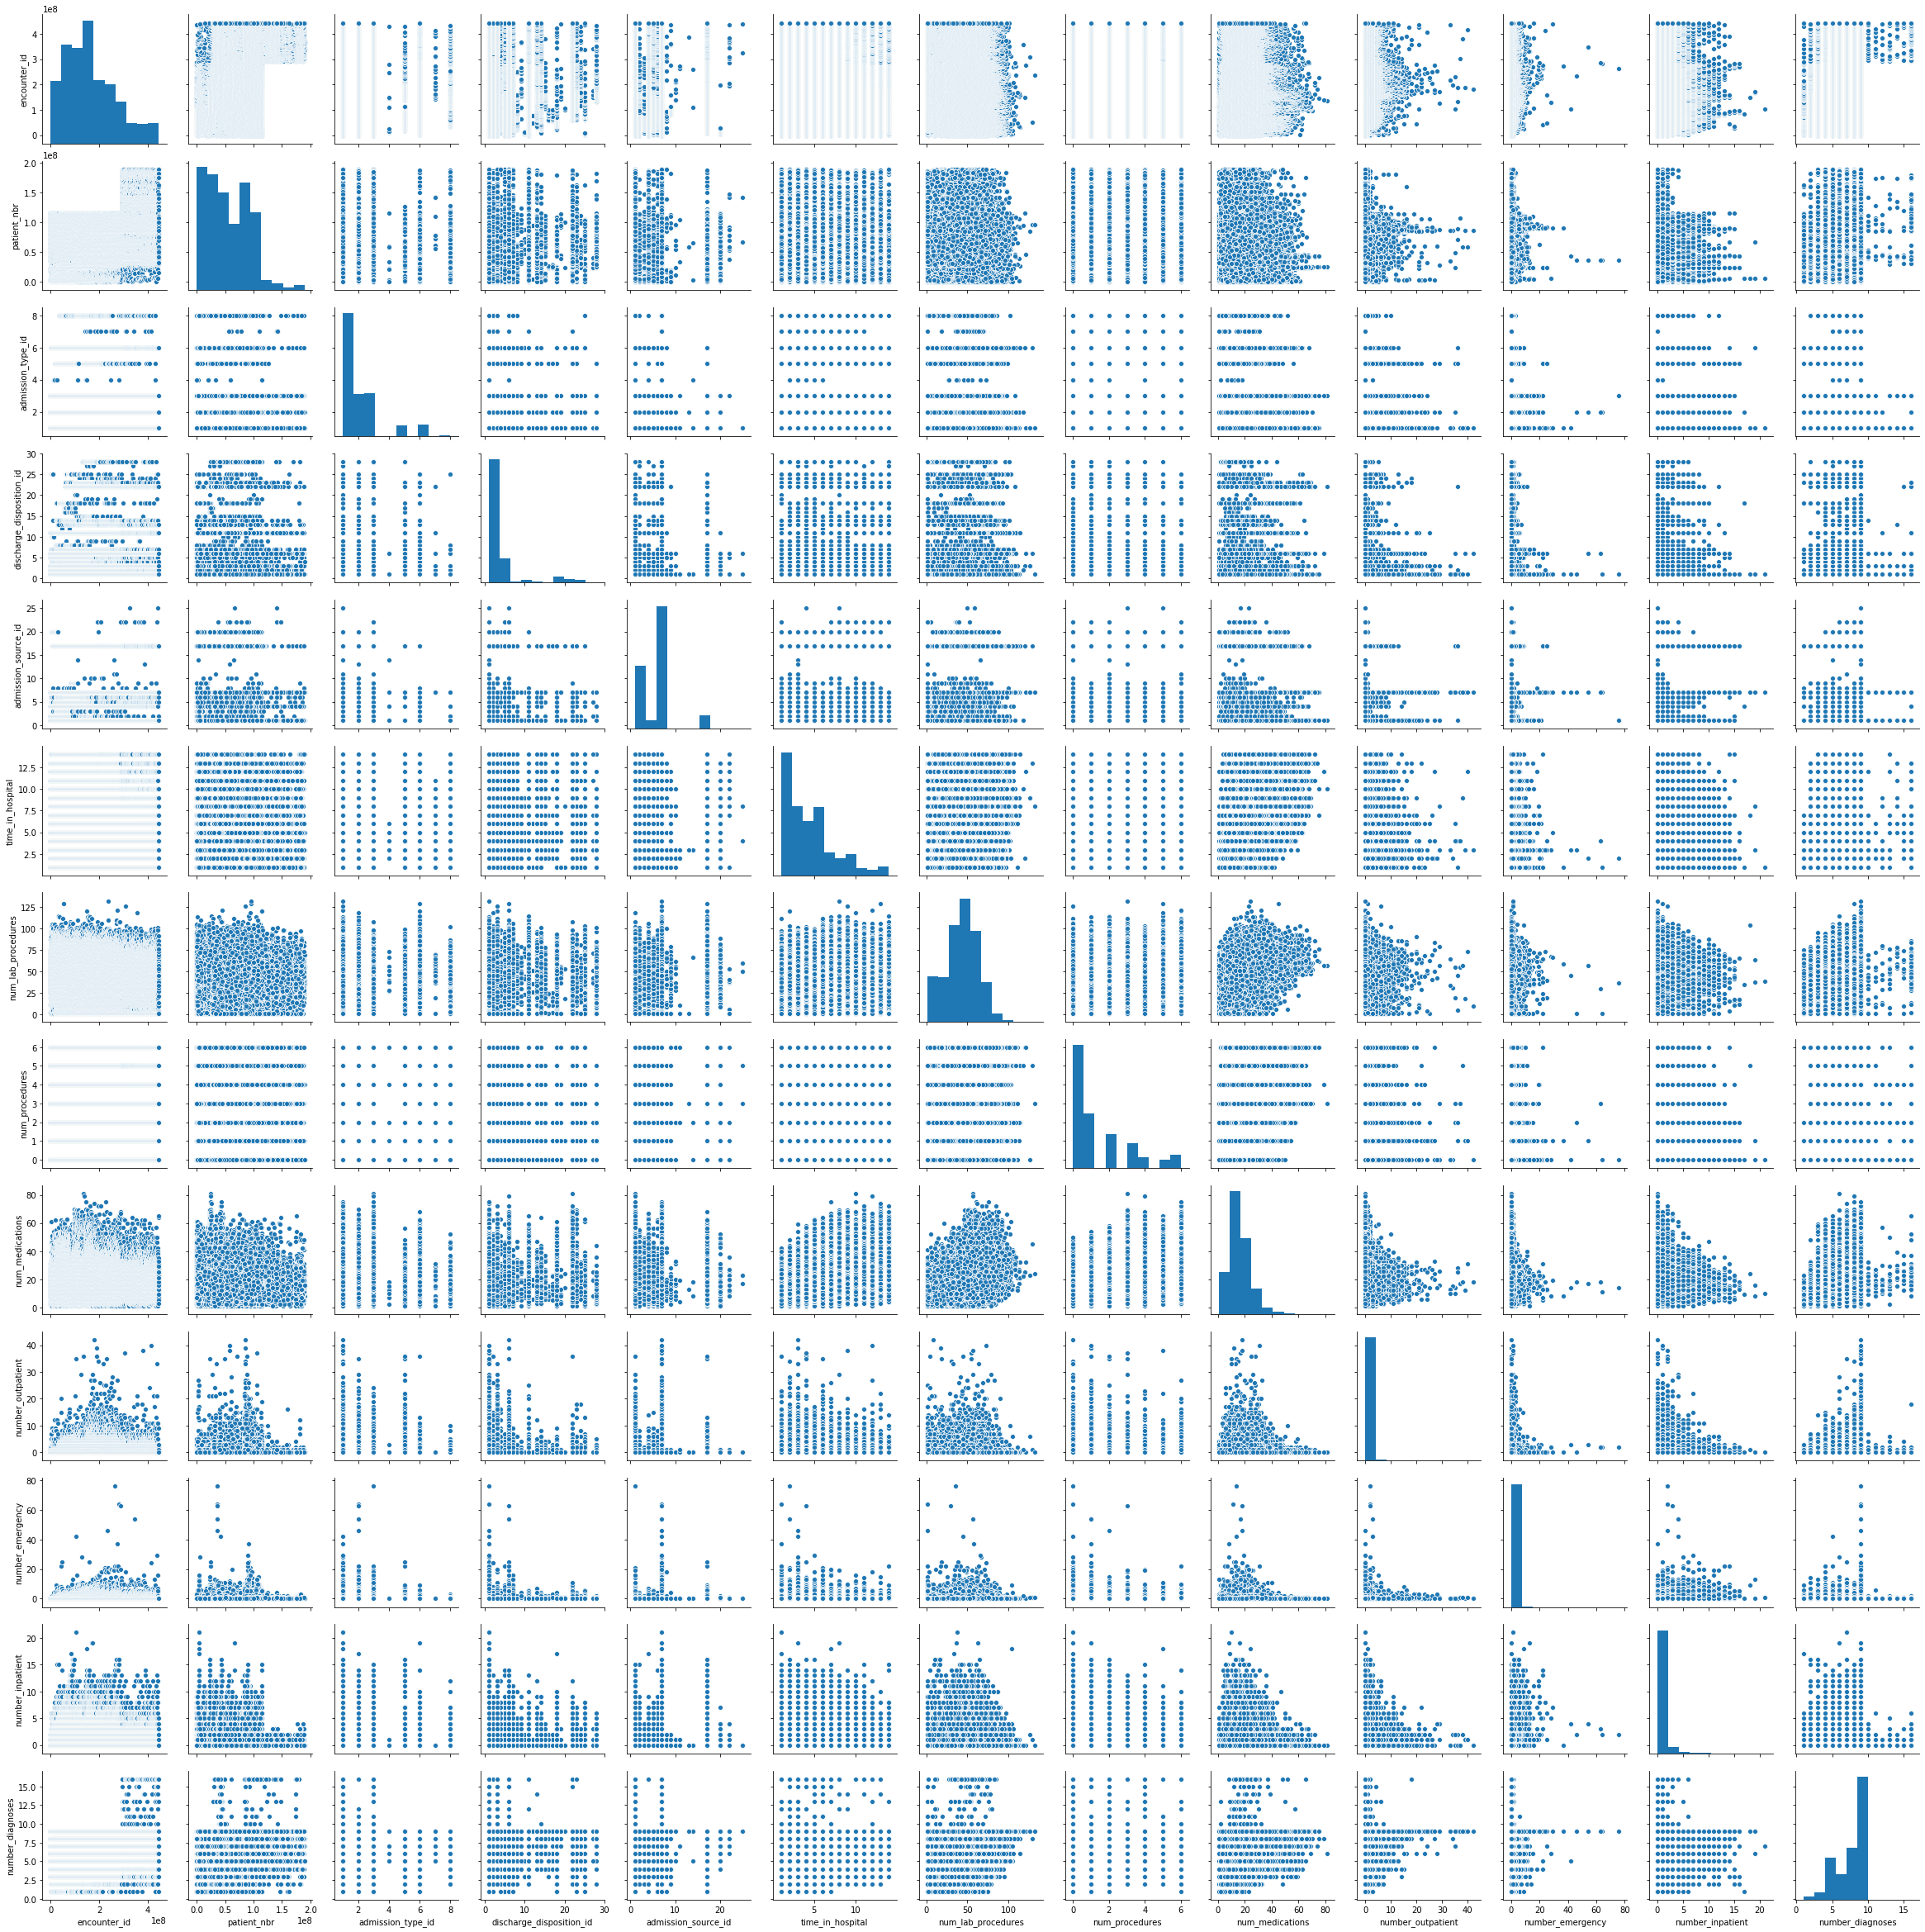

In [13]:
sns.pairplot(data)
plt.show()

<BarContainer object of 3 artists>

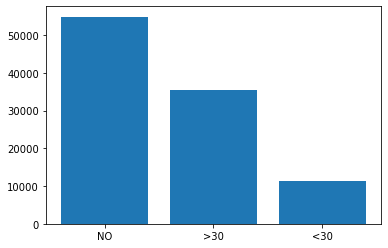

In [8]:
# View labels
plt.bar(data['readmitted'].value_counts().index, data['readmitted'].value_counts().values)

In [19]:
for col in data.columns:
    print(data[col].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-1

## Data cleaning

In [34]:
['metformin_' + col.lower() for col in data['metformin'].value_counts().index]

['metformin_no', 'metformin_steady', 'metformin_up', 'metformin_down']

### Create dummy variables

In [128]:
def create_dummies(data, col):
    
    dummies = pd.get_dummies(data[col], prefix=col)
    dummies.columns = [col.lower() for col in dummies.columns]
    data_ = pd.merge(data, dummies, left_index=True, right_index=True)
    
    return data_

columns = ['race', 'gender', 'diabetesMed', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
data_ = data.copy(deep=True)
for col in columns:
    
    data_ = create_dummies(data_, col)

data_.drop(columns, axis=1, inplace=True)


# Remove data that has str values for diag_1, diag_2, diag_3, max_glu_serum, A1Cresult, weight, age

clean_data_cols = ['diag_1', 'diag_2', 'diag_3']

def test_str(obj):
    
    try: 
        float(obj)
        return True
    except:
        return False

for col in clean_data_cols:
    data_ = data_[data_[col].apply(lambda x: test_str(x))]

# Select feature for training model
# 'age', 'weight', 'max_glu_serum', 'A1Cresult',
features = ['readmitted', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses',  'race_?', 'race_africanamerican',
       'race_asian', 'race_caucasian', 'race_hispanic', 'race_other',
       'gender_female', 'gender_male', 'gender_unknown/invalid',
       'metformin_down', 'metformin_no', 'metformin_steady', 'metformin_up',
       'repaglinide_down', 'repaglinide_no', 'repaglinide_steady',
       'repaglinide_up', 'nateglinide_down', 'nateglinide_no',
       'nateglinide_steady', 'nateglinide_up', 'chlorpropamide_down',
       'chlorpropamide_no', 'chlorpropamide_steady', 'chlorpropamide_up',
       'glimepiride_down', 'glimepiride_no', 'glimepiride_steady',
       'glimepiride_up', 'acetohexamide_no', 'acetohexamide_steady',
       'glipizide_down', 'glipizide_no', 'glipizide_steady', 'glipizide_up',
       'glyburide_down', 'glyburide_no', 'glyburide_steady', 'glyburide_up',
       'tolbutamide_no', 'tolbutamide_steady', 'pioglitazone_down',
       'pioglitazone_no', 'pioglitazone_steady', 'pioglitazone_up',
       'rosiglitazone_down', 'rosiglitazone_no', 'rosiglitazone_steady',
       'rosiglitazone_up', 'acarbose_down', 'acarbose_no', 'acarbose_steady',
       'acarbose_up', 'miglitol_down', 'miglitol_no', 'miglitol_steady',
       'miglitol_up', 'troglitazone_no', 'troglitazone_steady',
       'tolazamide_no', 'tolazamide_steady', 'tolazamide_up', 'examide_no',
       'citoglipton_no', 'insulin_down', 'insulin_no', 'insulin_steady',
       'insulin_up', 'glyburide-metformin_down', 'glyburide-metformin_no',
       'glyburide-metformin_steady', 'glyburide-metformin_up',
       'glipizide-metformin_no', 'glipizide-metformin_steady',
       'glimepiride-pioglitazone_no', 'glimepiride-pioglitazone_steady', 'metformin-rosiglitazone_no',
       'metformin-rosiglitazone_steady', 'metformin-pioglitazone_no',
       'metformin-pioglitazone_steady']

data_ = data_[features]
    
label = 'readmitted'
data_[label] = data_[label].apply(lambda x: 1 if x == '<30' else 0)
X, y = data_.drop(label, axis=1), data_[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

### Train logistic regression model

In [129]:
X_train.shape, y_train.shape

((68883, 91), (68883,))

In [130]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/mattheweng/anaconda/envs/bio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lr = LogisticRegression()

cross_val_score(lr, X, y, cv=5, scoring='f1')

/Users/mattheweng/anaconda/envs/bio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mattheweng/anaconda/envs/bio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

array([0.01334604, 0.03098592, 0.03097137, 0.04245501, 0.05868867])